# 网络爬虫与数据可视化大作业

本notebook演示如何使用Python进行网络爬虫，分别爬取当当网图书数据和豆瓣电影数据，并进行可视化分析，包括箱线图和小提琴图的绘制。

## 目录
1. [环境准备与库导入](#1-环境准备与库导入)
2. [网络爬虫实现](#2-网络爬虫实现)
   - 2.1 [当当网图书爬虫](#21-当当网图书爬虫)
   - 2.2 [豆瓣电影爬虫](#22-豆瓣电影爬虫)
3. [数据清洗与处理](#3-数据清洗与处理)
4. [数据可视化](#4-数据可视化)
5. [总结](#5-总结)

## 1. 环境准备与库导入

In [1]:
# 基础库
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import random
import json
import re

# 数据可视化库
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 中文字体设置
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 设置随机种子
np.random.seed(42)
random.seed(42)

print("所有库导入成功！")

所有库导入成功！


## 2. 网络爬虫实现

### 2.1 当当网图书爬虫

In [40]:
class DangdangBookScraper:
    def __init__(self):
        self.books = []
        
    def request_dandan(self, url):
        """发送请求获取页面内容"""
        try:
            response = requests.get(url)
            if response.status_code == 200:
                return response.text
        except requests.RequestException as e:
            print(f"请求出错: {e}")
            return None

    def parse_result(self, html):
        """解析页面内容"""
        if not html:
            return []
            
        pattern = re.compile(
            r'<li.*?list_num.*?(\d+)\.</div>.*?<img src="(.*?)".*?class="name".*?title="(.*?)">.*?class="star">.*?class="tuijian">(.*?)</span>.*?class="publisher_info">.*?target="_blank">(.*?)</a>.*?class="biaosheng">.*?<span>(.*?)</span></div>.*?<p><span class="price_n">(.*?)</span>.*?</li>', re.S)
        items = re.findall(pattern, html)

        books = []
        for item in items:
            # 处理价格：去除 &yen; 符号和其他可能的符号
            price_str = item[6] if item[6] else "0"
            price_str = price_str.replace('&yen;', '').replace('¥', '').replace('￥', '').strip()
            try:
                price = float(price_str) if price_str else 0
            except ValueError:
                price = 0
                
            book_data = {
                '排名': int(item[0]),
                '图片': item[1],
                '书名': item[2],
                '推荐度': item[3],
                '作者': item[4],
                '出版时间': item[5],
                '价格': price
            }
            books.append(book_data)
        return books

    def scrape_books(self, max_pages=5):
        """爬取图书数据"""
        print(f"开始爬取当当网图书数据，共{max_pages}页...")
        
        for i in range(1, max_pages + 1):
            url = f'http://bang.dangdang.com/books/fivestars/01.00.00.00.00.00-recent30-0-0-1-{i}'
            print(f'正在爬取第{i}页数据...')
            
            html = self.request_dandan(url)
            if html:
                books = self.parse_result(html)
                self.books.extend(books)
                print(f'第{i}页获取到{len(books)}本书')
            else:
                print(f'第{i}页爬取失败')
            
            # 延时避免被反爬
            time.sleep(random.uniform(1, 2))
        
        print(f'图书数据爬取完成！总共获取到{len(self.books)}本书')
        return self.books

# 创建爬虫实例并执行
book_scraper = DangdangBookScraper()
books_data = book_scraper.scrape_books(max_pages=20)  # 爬取20页数据进行演示

# 转换为DataFrame
books_df = pd.DataFrame(books_data)
print(f"\n图书数据预览:")
print(books_df.head())
print(f"\n图书数据形状: {books_df.shape}")

开始爬取当当网图书数据，共20页...
正在爬取第1页数据...
第1页获取到20本书
正在爬取第2页数据...
第2页获取到20本书
正在爬取第3页数据...
第3页获取到20本书
正在爬取第4页数据...
第4页获取到20本书
正在爬取第5页数据...
第5页获取到20本书
正在爬取第6页数据...
第6页获取到20本书
正在爬取第7页数据...
第7页获取到20本书
正在爬取第8页数据...
第8页获取到20本书
正在爬取第9页数据...
第9页获取到20本书
正在爬取第10页数据...
第10页获取到20本书
正在爬取第11页数据...
第11页获取到20本书
正在爬取第12页数据...
第12页获取到20本书
正在爬取第13页数据...
第13页获取到20本书
正在爬取第14页数据...
第14页获取到20本书
正在爬取第15页数据...
第15页获取到20本书
正在爬取第16页数据...
第16页获取到20本书
正在爬取第17页数据...
第17页获取到20本书
正在爬取第18页数据...
第18页获取到20本书
正在爬取第19页数据...
第19页获取到20本书
正在爬取第20页数据...
第20页获取到0本书
图书数据爬取完成！总共获取到380本书

图书数据预览:
   排名                                                 图片  \
0   1  http://img3m0.ddimg.cn/82/18/29878480-1_l_1745...   
1   2  http://img3m2.ddimg.cn/81/29/29819772-1_l_1738...   
2   3  http://img3m1.ddimg.cn/81/6/29849571-1_l_17422...   
3   4  http://img3m8.ddimg.cn/29/32/29876348-1_l_1747...   
4   5  http://img3m5.ddimg.cn/34/7/29845465-1_l_17391...   

                                         书名     推荐度     作者   出版时间     价格  
0             

### 2.2 豆瓣电影爬虫

In [41]:
class DoubanMovieScraper:
    def __init__(self):
        self.movies = []
    
    def request_douban(self, url):
        """发送请求获取页面内容"""
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) '
                          'Chrome/88.0.4324.146 Safari/537.36',
        }

        try:
            response = requests.get(url=url, headers=headers)
            if response.status_code == 200:
                return response.text
        except requests.RequestException as e:
            print(f"请求出错: {e}")
            return None

    def parse_movies(self, soup):
        """解析电影信息"""
        movies = []
        movie_list = soup.find(class_='grid_view')
        if not movie_list:
            return movies
            
        movie_list = movie_list.find_all('li')

        for item in movie_list:
            try:
                # 电影名称
                item_name = item.find(class_='title').string
                
                # 图片
                item_img = item.find('a').find('img').get('src')
                
                # 排名
                item_index = item.find(class_='').string
                
                # 评分
                item_score = float(item.find(class_='rating_num').string)
                
                # 导演和演员信息
                item_author = item.find('p').text.strip()
                
                # 简介
                inq_element = item.find(class_='inq')
                item_intr = inq_element.string if inq_element else 'NOT AVAILABLE'

                print('爬取电影：' + item_index + ' | ' + item_name + ' | ' + str(item_score) + ' | ' + item_intr)

                movie_data = {
                    '名称': item_name,
                    '图片': item_img,
                    '排名': int(item_index),
                    '评分': item_score,
                    '作者信息': item_author,
                    '简介': item_intr
                }
                
                movies.append(movie_data)
            except Exception as e:
                print(f"解析电影信息出错: {e}")
                continue
        
        return movies

    def scrape_movies(self, max_pages=5):
        """爬取电影数据"""
        print(f"开始爬取豆瓣电影Top250数据，共{max_pages}页...")
        
        for i in range(max_pages):
            url = 'https://movie.douban.com/top250?start=' + str(i * 25) + '&filter='
            print(f'正在爬取第{i+1}页数据...')
            
            html = self.request_douban(url)
            if html:
                soup = BeautifulSoup(html, 'lxml')
                movies = self.parse_movies(soup)
                self.movies.extend(movies)
                print(f'第{i+1}页获取到{len(movies)}部电影')
            else:
                print(f'第{i+1}页爬取失败')
            
            # 延时避免被反爬
            time.sleep(random.uniform(2, 4))
        
        print(f'电影数据爬取完成！总共获取到{len(self.movies)}部电影')
        return self.movies

# 创建爬虫实例并执行
movie_scraper = DoubanMovieScraper()
movies_data = movie_scraper.scrape_movies(max_pages=3)  # 爬取3页数据进行演示

# 转换为DataFrame
movies_df = pd.DataFrame(movies_data)
print(f"\n电影数据预览:")
print(movies_df.head())
print(f"\n电影数据形状: {movies_df.shape}")

开始爬取豆瓣电影Top250数据，共3页...
正在爬取第1页数据...
爬取电影：1 | 肖申克的救赎 | 9.7 | NOT AVAILABLE
爬取电影：2 | 霸王别姬 | 9.6 | NOT AVAILABLE
爬取电影：3 | 泰坦尼克号 | 9.5 | NOT AVAILABLE
爬取电影：4 | 阿甘正传 | 9.5 | NOT AVAILABLE
爬取电影：5 | 千与千寻 | 9.4 | NOT AVAILABLE
爬取电影：6 | 美丽人生 | 9.5 | NOT AVAILABLE
爬取电影：7 | 这个杀手不太冷 | 9.4 | NOT AVAILABLE
爬取电影：8 | 星际穿越 | 9.4 | NOT AVAILABLE
爬取电影：9 | 盗梦空间 | 9.4 | NOT AVAILABLE
爬取电影：10 | 楚门的世界 | 9.4 | NOT AVAILABLE
爬取电影：11 | 辛德勒的名单 | 9.5 | NOT AVAILABLE
爬取电影：12 | 忠犬八公的故事 | 9.4 | NOT AVAILABLE
爬取电影：13 | 海上钢琴师 | 9.3 | NOT AVAILABLE
爬取电影：14 | 三傻大闹宝莱坞 | 9.2 | NOT AVAILABLE
爬取电影：15 | 疯狂动物城 | 9.2 | NOT AVAILABLE
爬取电影：16 | 放牛班的春天 | 9.3 | NOT AVAILABLE
爬取电影：17 | 机器人总动员 | 9.3 | NOT AVAILABLE
爬取电影：18 | 无间道 | 9.3 | NOT AVAILABLE
爬取电影：19 | 控方证人 | 9.6 | NOT AVAILABLE
爬取电影：20 | 大话西游之大圣娶亲 | 9.2 | NOT AVAILABLE
爬取电影：21 | 熔炉 | 9.3 | NOT AVAILABLE
爬取电影：22 | 触不可及 | 9.3 | NOT AVAILABLE
爬取电影：23 | 教父 | 9.3 | NOT AVAILABLE
爬取电影：24 | 寻梦环游记 | 9.1 | NOT AVAILABLE
爬取电影：25 | 当幸福来敲门 | 9.1 | NOT AVAILABLE
第1页获取到25部电影
正在爬取第2页数据..

## 3. 数据清洗与处理

In [42]:
# 图书数据处理
print("=== 图书数据处理 ===")
if not books_df.empty:
    print(f"图书数据形状: {books_df.shape}")
    print(f"\n图书数据类型:")
    print(books_df.dtypes)
    print(f"\n缺失值统计:")
    print(books_df.isnull().sum())
    
    # 价格分组
    if '价格' in books_df.columns and books_df['价格'].dtype in ['float64', 'int64']:
        def categorize_price(price):
            if price <= 30:
                return '低价位(≤30元)'
            elif price <= 60:
                return '中价位(30-60元)'
            else:
                return '高价位(>60元)'
        
        books_df['价格分组'] = books_df['价格'].apply(categorize_price)
    
    print("\n图书数据描述性统计:")
    print(books_df.describe())
else:
    print("图书数据为空，可能爬取失败")

print("\n" + "="*50)

# 电影数据处理
print("=== 电影数据处理 ===")
if not movies_df.empty:
    print(f"电影数据形状: {movies_df.shape}")
    print(f"\n电影数据类型:")
    print(movies_df.dtypes)
    print(f"\n缺失值统计:")
    print(movies_df.isnull().sum())
    
    # 评分分组
    if '评分' in movies_df.columns and movies_df['评分'].dtype in ['float64', 'int64']:
        def categorize_rating(rating):
            if rating >= 9.0:
                return '经典(≥9.0)'
            elif rating >= 8.5:
                return '优秀(8.5-9.0)'
            elif rating >= 8.0:
                return '良好(8.0-8.5)'
            else:
                return '一般(<8.0)'
        
        movies_df['评分等级'] = movies_df['评分'].apply(categorize_rating)
    
    print("\n电影数据描述性统计:")
    print(movies_df.describe())
else:
    print("电影数据为空，可能爬取失败")

=== 图书数据处理 ===
图书数据形状: (380, 7)

图书数据类型:
排名        int64
图片       object
书名       object
推荐度      object
作者       object
出版时间     object
价格      float64
dtype: object

缺失值统计:
排名      0
图片      0
书名      0
推荐度     0
作者      0
出版时间    0
价格      0
dtype: int64

图书数据描述性统计:
               排名          价格
count  380.000000  380.000000
mean   190.500000   41.551158
std    109.840794   33.439095
min      1.000000    2.200000
25%     95.750000   25.042500
50%    190.500000   35.850000
75%    285.250000   49.800000
max    380.000000  398.000000

=== 电影数据处理 ===
电影数据形状: (75, 6)

电影数据类型:
名称       object
图片       object
排名        int64
评分      float64
作者信息     object
简介       object
dtype: object

缺失值统计:
名称      0
图片      0
排名      0
评分      0
作者信息    0
简介      0
dtype: int64

电影数据描述性统计:
              排名         评分
count  75.000000  75.000000
mean   38.000000   9.206667
std    21.794495   0.186238
min     1.000000   8.800000
25%    19.500000   9.100000
50%    38.000000   9.200000
75%    56.500000   9

## 4. 数据可视化

### 4.1 图书数据可视化

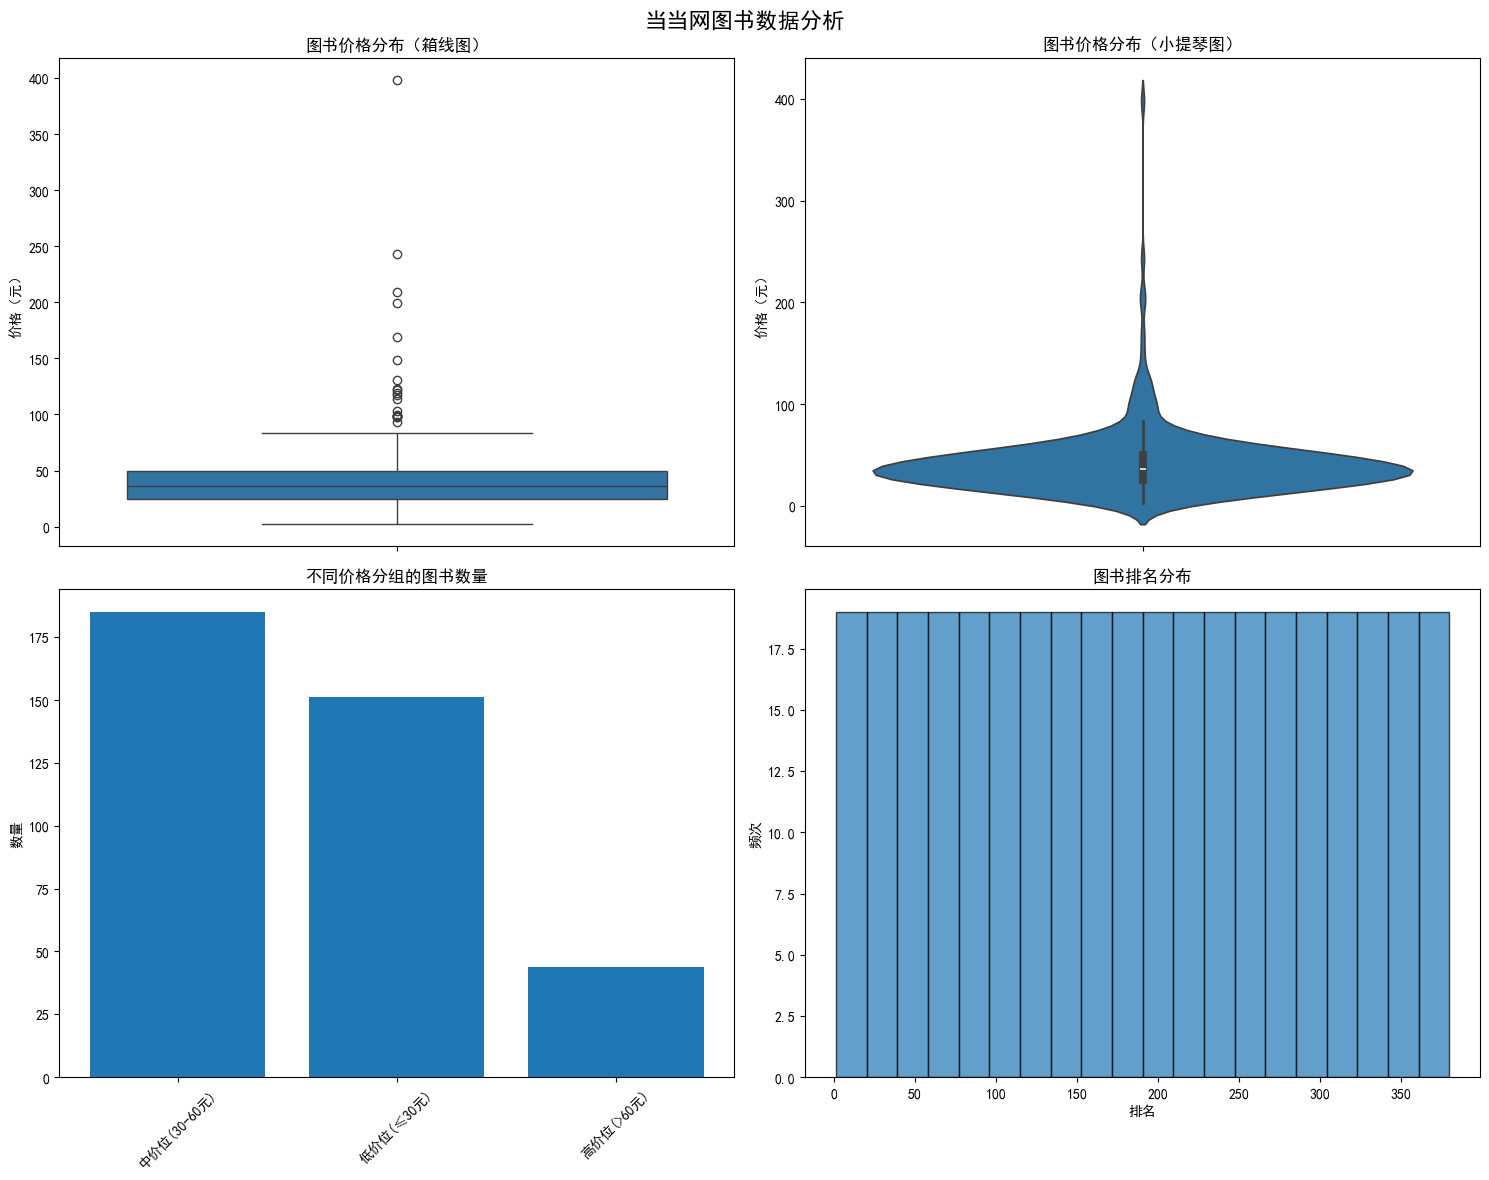

=== 图书数据统计信息 ===
平均价格: 41.55元
价格中位数: 35.85元
价格标准差: 33.44元

价格分组统计:
价格分组
中价位(30-60元)    185
低价位(≤30元)      151
高价位(>60元)       44
Name: count, dtype: int64


In [43]:
if not books_df.empty:
    # 创建图书数据可视化
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('当当网图书数据分析', fontsize=16, fontweight='bold')

    # 1. 图书价格分布箱线图
    if '价格' in books_df.columns:
        sns.boxplot(y=books_df['价格'], ax=axes[0, 0])
        axes[0, 0].set_title('图书价格分布（箱线图）')
        axes[0, 0].set_ylabel('价格（元）')

    # 2. 图书价格分布小提琴图
    if '价格' in books_df.columns:
        sns.violinplot(y=books_df['价格'], ax=axes[0, 1])
        axes[0, 1].set_title('图书价格分布（小提琴图）')
        axes[0, 1].set_ylabel('价格（元）')

    # 3. 不同价格分组的图书数量
    if '价格分组' in books_df.columns:
        price_counts = books_df['价格分组'].value_counts()
        axes[1, 0].bar(price_counts.index, price_counts.values)
        axes[1, 0].set_title('不同价格分组的图书数量')
        axes[1, 0].set_ylabel('数量')
        axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. 图书排名分布
    if '排名' in books_df.columns:
        axes[1, 1].hist(books_df['排名'], bins=20, alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('图书排名分布')
        axes[1, 1].set_xlabel('排名')
        axes[1, 1].set_ylabel('频次')

    plt.tight_layout()
    plt.show()
    
    # 打印图书统计信息
    print("=== 图书数据统计信息 ===")
    if '价格' in books_df.columns:
        print(f"平均价格: {books_df['价格'].mean():.2f}元")
        print(f"价格中位数: {books_df['价格'].median():.2f}元")
        print(f"价格标准差: {books_df['价格'].std():.2f}元")
    
    if '价格分组' in books_df.columns:
        print("\n价格分组统计:")
        print(books_df['价格分组'].value_counts())
else:
    print("图书数据为空，无法进行可视化")

### 4.2 电影数据可视化

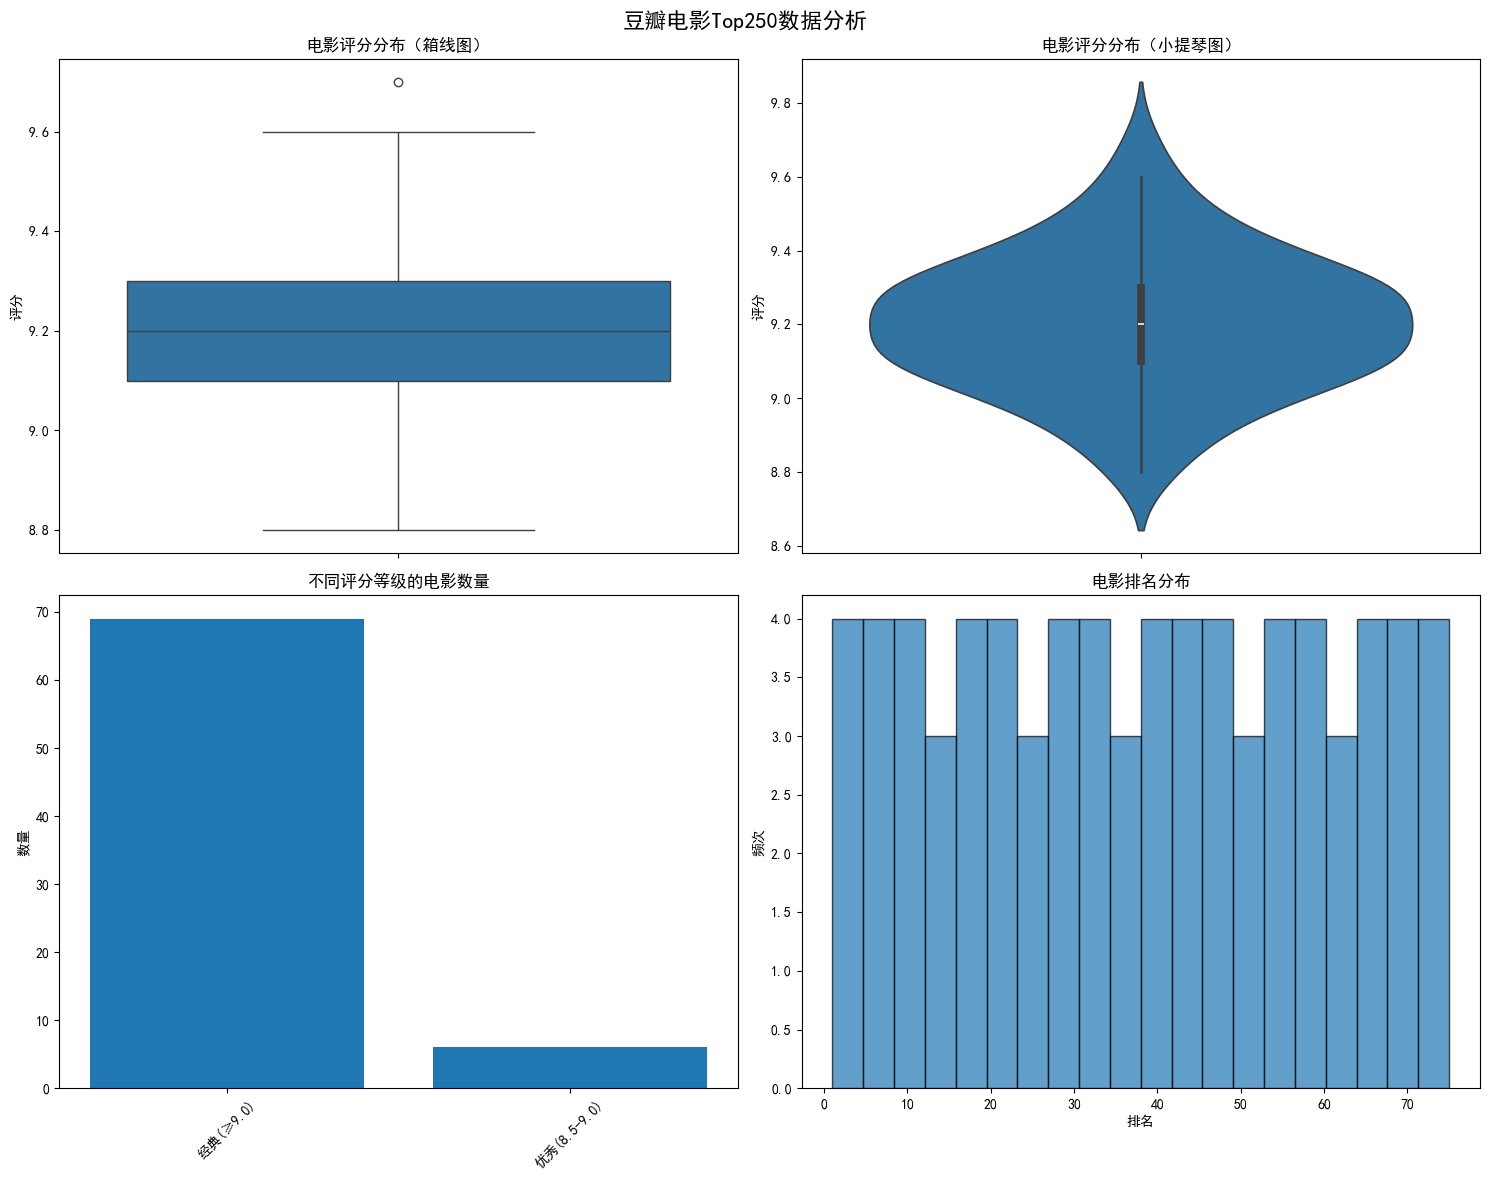

=== 电影数据统计信息 ===
平均评分: 9.21
评分中位数: 9.20
评分标准差: 0.19

评分等级统计:
评分等级
经典(≥9.0)       69
优秀(8.5-9.0)     6
Name: count, dtype: int64


In [44]:
if not movies_df.empty:
    # 创建电影数据可视化
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('豆瓣电影Top250数据分析', fontsize=16, fontweight='bold')

    # 1. 电影评分分布箱线图
    if '评分' in movies_df.columns:
        sns.boxplot(y=movies_df['评分'], ax=axes[0, 0])
        axes[0, 0].set_title('电影评分分布（箱线图）')
        axes[0, 0].set_ylabel('评分')

    # 2. 电影评分分布小提琴图
    if '评分' in movies_df.columns:
        sns.violinplot(y=movies_df['评分'], ax=axes[0, 1])
        axes[0, 1].set_title('电影评分分布（小提琴图）')
        axes[0, 1].set_ylabel('评分')

    # 3. 不同评分等级的电影数量
    if '评分等级' in movies_df.columns:
        rating_counts = movies_df['评分等级'].value_counts()
        axes[1, 0].bar(rating_counts.index, rating_counts.values)
        axes[1, 0].set_title('不同评分等级的电影数量')
        axes[1, 0].set_ylabel('数量')
        axes[1, 0].tick_params(axis='x', rotation=45)

    # 4. 电影排名分布
    if '排名' in movies_df.columns:
        axes[1, 1].hist(movies_df['排名'], bins=20, alpha=0.7, edgecolor='black')
        axes[1, 1].set_title('电影排名分布')
        axes[1, 1].set_xlabel('排名')
        axes[1, 1].set_ylabel('频次')

    plt.tight_layout()
    plt.show()
    
    # 打印电影统计信息
    print("=== 电影数据统计信息 ===")
    if '评分' in movies_df.columns:
        print(f"平均评分: {movies_df['评分'].mean():.2f}")
        print(f"评分中位数: {movies_df['评分'].median():.2f}")
        print(f"评分标准差: {movies_df['评分'].std():.2f}")
    
    if '评分等级' in movies_df.columns:
        print("\n评分等级统计:")
        print(movies_df['评分等级'].value_counts())
else:
    print("电影数据为空，无法进行可视化")

### 4.3 箱线图与小提琴图对比分析

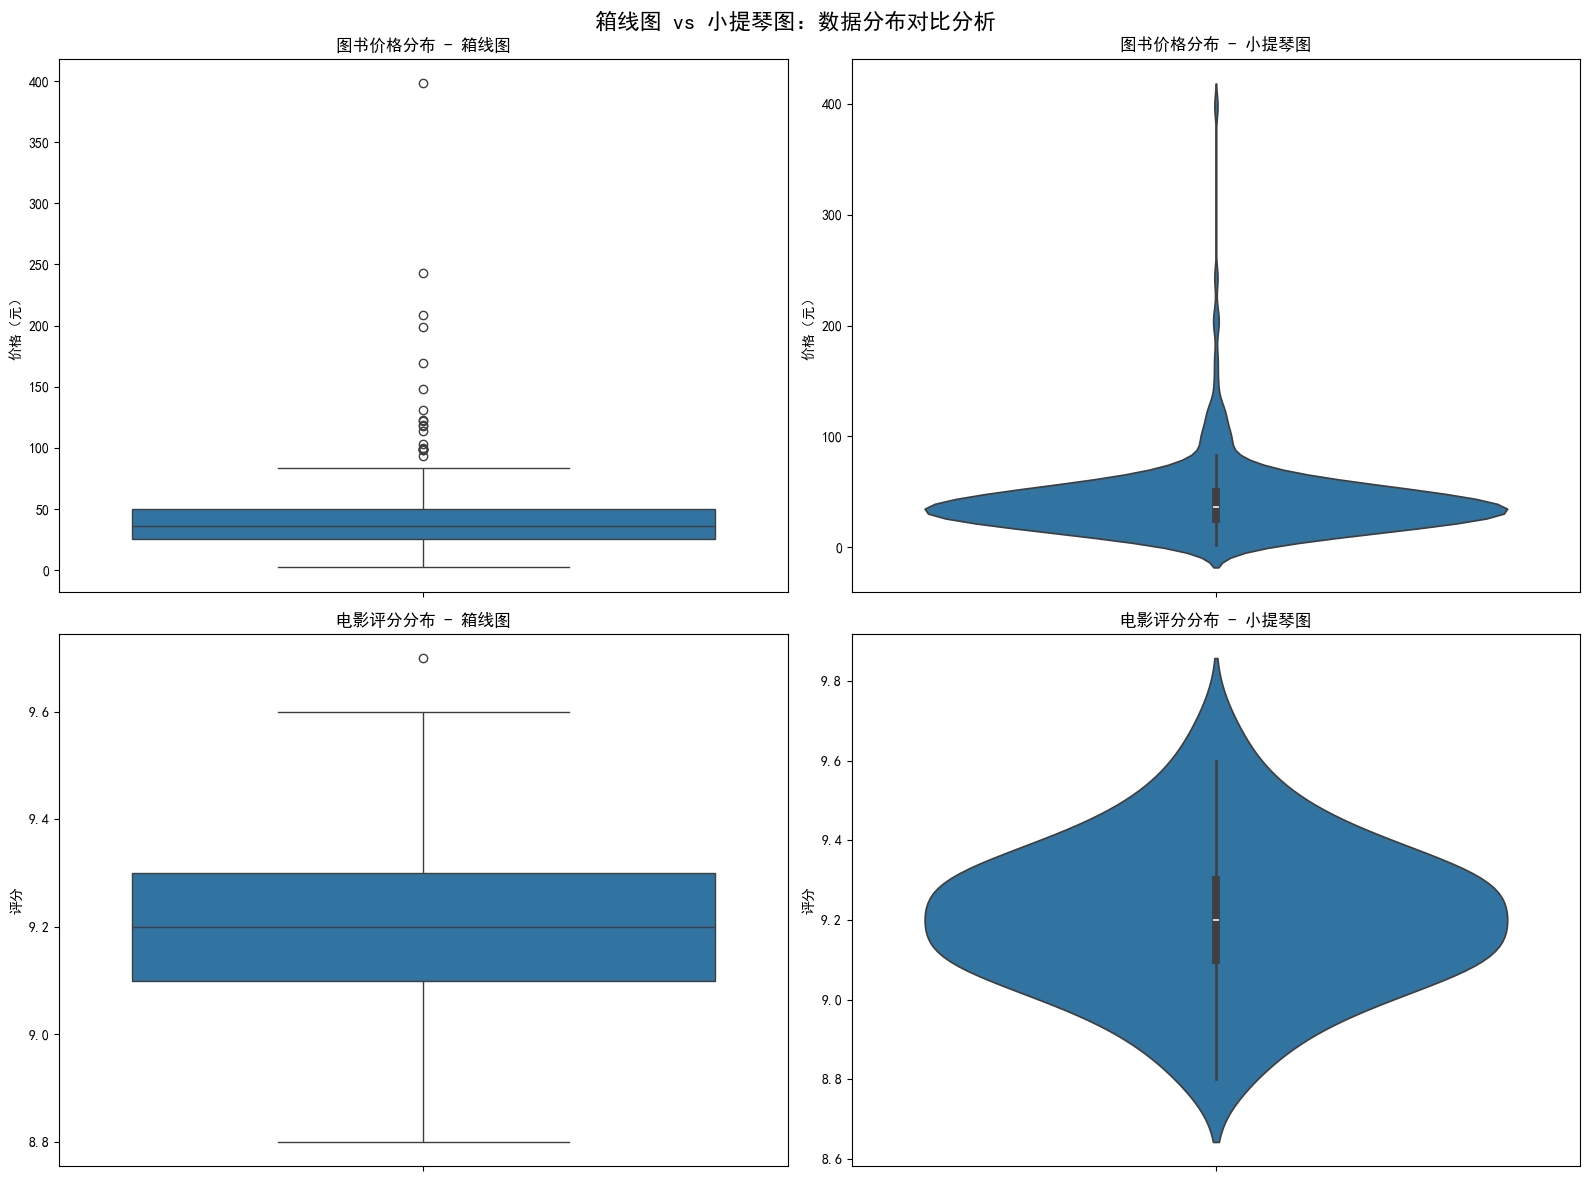

=== 箱线图和小提琴图分析说明 ===

箱线图特点:
- 清晰显示四分位数（Q1, Q2, Q3）
- 明确标识异常值（outliers）
- 适合快速了解数据的集中趋势和离散程度
- 占用空间小，适合多组数据对比

小提琴图特点:
- 显示数据的概率密度分布
- 能看出数据分布的形状（单峰、双峰等）
- 提供比箱线图更丰富的分布信息
- 适合分析数据的分布模式


In [45]:
# 创建箱线图与小提琴图对比
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('箱线图 vs 小提琴图：数据分布对比分析', fontsize=16, fontweight='bold')

# 图书价格对比
if not books_df.empty and '价格' in books_df.columns:
    # 箱线图
    sns.boxplot(y=books_df['价格'], ax=axes[0, 0])
    axes[0, 0].set_title('图书价格分布 - 箱线图')
    axes[0, 0].set_ylabel('价格（元）')
    
    # 小提琴图
    sns.violinplot(y=books_df['价格'], ax=axes[0, 1], inner='box')
    axes[0, 1].set_title('图书价格分布 - 小提琴图')
    axes[0, 1].set_ylabel('价格（元）')
else:
    axes[0, 0].text(0.5, 0.5, '图书数据不可用', ha='center', va='center', transform=axes[0, 0].transAxes)
    axes[0, 1].text(0.5, 0.5, '图书数据不可用', ha='center', va='center', transform=axes[0, 1].transAxes)

# 电影评分对比
if not movies_df.empty and '评分' in movies_df.columns:
    # 箱线图
    sns.boxplot(y=movies_df['评分'], ax=axes[1, 0])
    axes[1, 0].set_title('电影评分分布 - 箱线图')
    axes[1, 0].set_ylabel('评分')
    
    # 小提琴图
    sns.violinplot(y=movies_df['评分'], ax=axes[1, 1], inner='box')
    axes[1, 1].set_title('电影评分分布 - 小提琴图')
    axes[1, 1].set_ylabel('评分')
else:
    axes[1, 0].text(0.5, 0.5, '电影数据不可用', ha='center', va='center', transform=axes[1, 0].transAxes)
    axes[1, 1].text(0.5, 0.5, '电影数据不可用', ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

# 分析说明
print("=== 箱线图和小提琴图分析说明 ===")
print("\n箱线图特点:")
print("- 清晰显示四分位数（Q1, Q2, Q3）")
print("- 明确标识异常值（outliers）")
print("- 适合快速了解数据的集中趋势和离散程度")
print("- 占用空间小，适合多组数据对比")

print("\n小提琴图特点:")
print("- 显示数据的概率密度分布")
print("- 能看出数据分布的形状（单峰、双峰等）")
print("- 提供比箱线图更丰富的分布信息")
print("- 适合分析数据的分布模式")

### 4.4 交互式可视化

In [46]:
# 交互式图书数据可视化
if not books_df.empty and '价格' in books_df.columns:
    fig_book = px.box(books_df, y='价格', title='图书价格分布 - 交互式箱线图')
    fig_book.update_layout(width=800, height=500)
    fig_book.show()
    
    if '价格分组' in books_df.columns:
        fig_book_violin = px.violin(books_df, y='价格', color='价格分组', 
                                   title='不同价格分组的图书价格分布 - 交互式小提琴图',
                                   box=True)
        fig_book_violin.update_layout(width=800, height=500)
        fig_book_violin.show()

# 交互式电影数据可视化
if not movies_df.empty and '评分' in movies_df.columns:
    fig_movie = px.box(movies_df, y='评分', title='电影评分分布 - 交互式箱线图')
    fig_movie.update_layout(width=800, height=500)
    fig_movie.show()
    
    if '评分等级' in movies_df.columns:
        fig_movie_violin = px.violin(movies_df, y='评分', color='评分等级',
                                    title='不同评分等级的电影评分分布 - 交互式小提琴图',
                                    box=True)
        fig_movie_violin.update_layout(width=800, height=500)
        fig_movie_violin.show()

### 4.5 综合数据分析

In [47]:
# 数据概览
print("=== 综合数据分析报告 ===")
print(f"\n图书数据概况:")
if not books_df.empty:
    print(f"- 爬取图书数量: {len(books_df)} 本")
    if '价格' in books_df.columns:
        print(f"- 价格范围: {books_df['价格'].min():.2f} - {books_df['价格'].max():.2f} 元")
        print(f"- 平均价格: {books_df['价格'].mean():.2f} 元")
    if '排名' in books_df.columns:
        print(f"- 排名范围: {books_df['排名'].min()} - {books_df['排名'].max()}")
else:
    print("- 图书数据爬取失败")

print(f"\n电影数据概况:")
if not movies_df.empty:
    print(f"- 爬取电影数量: {len(movies_df)} 部")
    if '评分' in movies_df.columns:
        print(f"- 评分范围: {movies_df['评分'].min():.1f} - {movies_df['评分'].max():.1f} 分")
        print(f"- 平均评分: {movies_df['评分'].mean():.2f} 分")
    if '排名' in movies_df.columns:
        print(f"- 排名范围: {movies_df['排名'].min()} - {movies_df['排名'].max()}")
else:
    print("- 电影数据爬取失败")


=== 综合数据分析报告 ===

图书数据概况:
- 爬取图书数量: 380 本
- 价格范围: 2.20 - 398.00 元
- 平均价格: 41.55 元
- 排名范围: 1 - 380

电影数据概况:
- 爬取电影数量: 75 部
- 评分范围: 8.8 - 9.7 分
- 平均评分: 9.21 分
- 排名范围: 1 - 75
